<a href="https://www.kaggle.com/code/bhanupratapbiswas/weather-data-analysis?scriptVersionId=138054799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'> Weather Data Analysis </span></b> </div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/weather-data/Weather Data.csv


In [2]:
data = pd.read_csv('/kaggle/input/weather-data/Weather Data.csv')
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow



<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'> Exploratory Data Analysis (EDA)</span></b> </div>

In [3]:
data.shape

(8784, 8)

In [4]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [5]:
column = data.columns
for columns in column:
    print("->",columns)

-> Date/Time
-> Temp_C
-> Dew Point Temp_C
-> Rel Hum_%
-> Wind Speed_km/h
-> Visibility_km
-> Press_kPa
-> Weather


In [6]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
#unique_values
weather= data['Weather'].unique()
for weathers in weather:
    print("->",weathers)

-> Fog
-> Freezing Drizzle,Fog
-> Mostly Cloudy
-> Cloudy
-> Rain
-> Rain Showers
-> Mainly Clear
-> Snow Showers
-> Snow
-> Clear
-> Freezing Rain,Fog
-> Freezing Rain
-> Freezing Drizzle
-> Rain,Snow
-> Moderate Snow
-> Freezing Drizzle,Snow
-> Freezing Rain,Snow Grains
-> Snow,Blowing Snow
-> Freezing Fog
-> Haze
-> Rain,Fog
-> Drizzle,Fog
-> Drizzle
-> Freezing Drizzle,Haze
-> Freezing Rain,Haze
-> Snow,Haze
-> Snow,Fog
-> Snow,Ice Pellets
-> Rain,Haze
-> Thunderstorms,Rain
-> Thunderstorms,Rain Showers
-> Thunderstorms,Heavy Rain Showers
-> Thunderstorms,Rain Showers,Fog
-> Thunderstorms
-> Thunderstorms,Rain,Fog
-> Thunderstorms,Moderate Rain Showers,Fog
-> Rain Showers,Fog
-> Rain Showers,Snow Showers
-> Snow Pellets
-> Rain,Snow,Fog
-> Moderate Rain,Fog
-> Freezing Rain,Ice Pellets,Fog
-> Drizzle,Ice Pellets,Fog
-> Drizzle,Snow
-> Rain,Ice Pellets
-> Drizzle,Snow,Fog
-> Rain,Snow Grains
-> Rain,Snow,Ice Pellets
-> Snow Showers,Fog
-> Moderate Snow,Blowing Snow


In [8]:
#number of unique values
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [9]:
#count number of values
# not count null values
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [10]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [12]:
#find unique number of wind speeds
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [13]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [14]:
wind_speed = data['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 34


In [15]:
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [16]:
#find  number of Weather is exactly clear
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [17]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [18]:
#data.head(2)
data[data.Weather == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


<div style="padding: 0px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'>Show all Records Where Weather Condition is Clear</span></b> </div>

In [19]:
#data.head(2)
data.groupby("Weather").get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [20]:
data.groupby("Wind Speed_km/h").get_group(4).count()

Date/Time           474
Temp_C              474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

<div style="padding: 0px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'>Show all Records Where Wind Speed 4km/h </span></b> </div>

In [21]:
data[data['Wind Speed_km/h'] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [22]:
# find Null values
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [23]:
data.rename(columns = {'Weather': 'Weather condition'}, inplace = True)

In [24]:
data.head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [26]:
# variance of the Humidity
data.rename(columns = {'Rel Hum_%': 'Humidity'}, inplace = True)

In [27]:
#find al instance when  "Snow"
data['Weather condition'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

<div style="padding: 0px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'>Show all Records Where Weather Condition is Snow</span></b> </div>

In [28]:
data[data['Weather condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [29]:
data[data['Weather condition'].str.contains('Snow')].head(50)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
50,1/3/2012 2:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers
51,1/3/2012 3:00,-11.3,-18.7,54,33,25.0,100.61,Snow Showers
53,1/3/2012 5:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers
54,1/3/2012 6:00,-13.3,-19.3,61,19,25.0,100.85,Snow Showers
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow


<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:30px;'>Show all Records Where Wind Speen up to 24km/h And Visibility 25km</span></b> </div>

In [30]:
data[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km'] == 25)].head(20)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
30,1/2/2012 6:00,2.3,-2.6,70,26,25.0,99.18,Mostly Cloudy
31,1/2/2012 7:00,2.0,-2.9,70,33,25.0,99.14,Mostly Cloudy
42,1/2/2012 18:00,-4.1,-11.4,57,28,25.0,99.86,Mostly Cloudy


In [31]:
data.groupby('Weather condition').mean()

/tmp/ipykernel_19/3369097005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Weather condition').mean()


,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
Weather condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [32]:
#min value
data.groupby('Weather condition').min()

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
Weather condition,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44



<div style="padding: 0px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'>show all records where weather condition is fog</span></b> </div>

In [33]:
data[data['Weather condition'] == 'Fog'].head(20)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog
10,1/1/2012 10:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,1/1/2012 11:00,-0.5,-2.1,89,7,4.0,100.98,Fog


In [34]:
data[(data['Weather condition'] == 'Clear') | (data['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


In [35]:
# Wether is Clear and 'Relative humidity' is Greater than 50
#or
#visibility is above 40
data[(data['Weather condition'] == 'Clear') & (data['Humidity'] > 50) | (data['Visibility_km'] >40)].head(20)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
111,1/5/2012 15:00,-4.3,-12.0,55,26,48.3,100.52,Mainly Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear


In [36]:
column = data.columns
for columns in column:
    print("->",columns)

-> Date/Time
-> Temp_C
-> Dew Point Temp_C
-> Humidity
-> Wind Speed_km/h
-> Visibility_km
-> Press_kPa
-> Weather condition


<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cdn.pixabay.com/photo/2016/05/03/09/40/thunder-1368797_1280.jpg)"><b><span style='color:white; font-size:45px;'>Data Visualization</span></b> </div

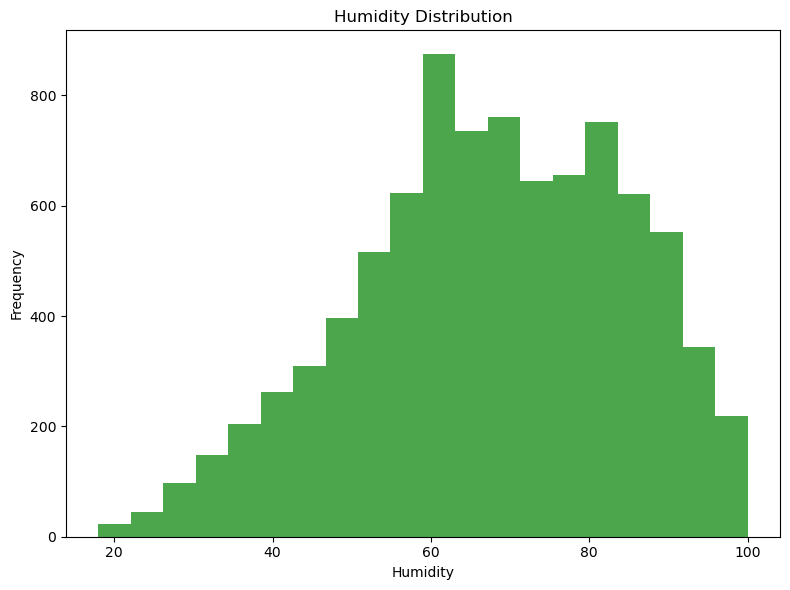

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(data['Humidity'], bins=20, color='green', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()


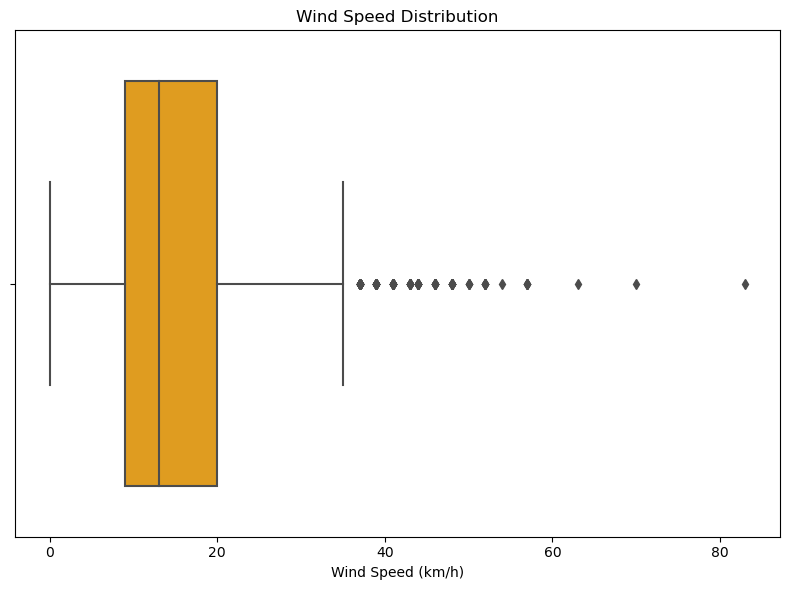

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Wind Speed_km/h'], color='orange')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()


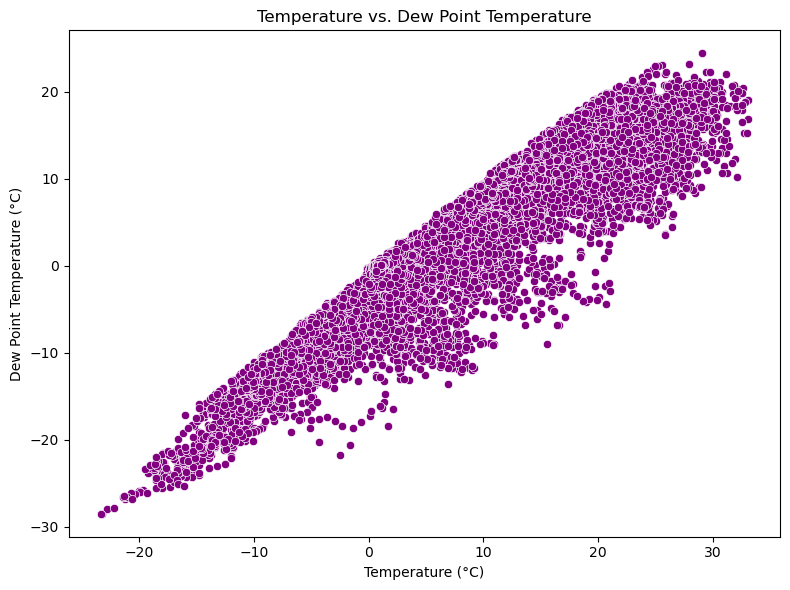

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()


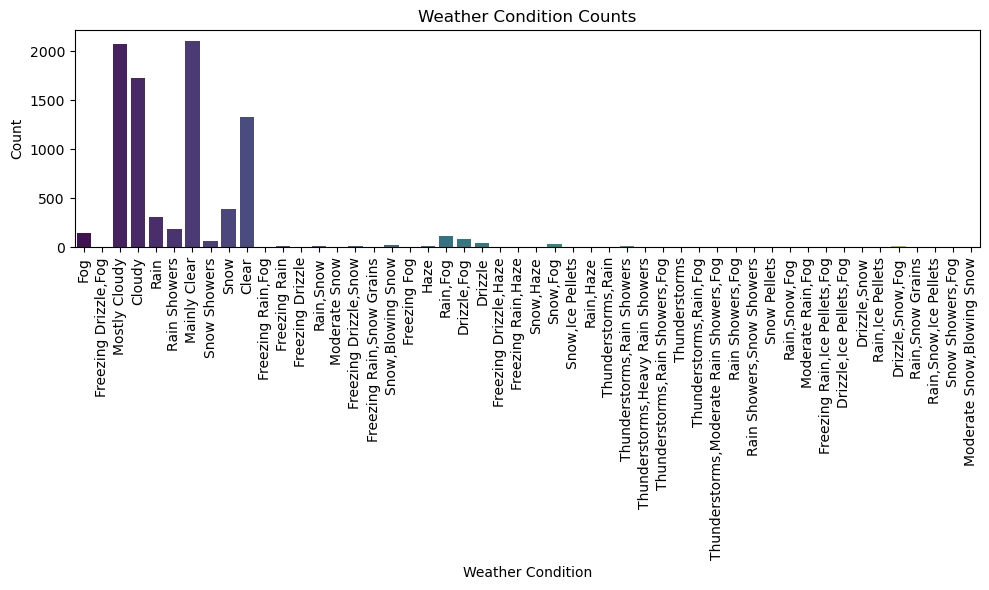

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather condition', data=data, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
